<a href="https://colab.research.google.com/github/Tegashivute/Data-structures-and-algorithms--1-assingment/blob/main/DTF_assignment(FInal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.**Project understanding:** The aim of this project is to conduct a comprehensive profitability analysis by using python based data tools.

**2.Data collection and preparation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
q1_df = pd.read_excel('/content/ProjectQ1Sales.xlsx')
q2_df = pd.read_excel('/content/ProjectQ2Sales.xlsx')
q3_df = pd.read_excel('/content/ProjectQ3Sales.xlsx')
q4_df = pd.read_excel('/content/ProjectQ4Sales.xlsx')

products_df = pd.read_csv('/content/Project_products.csv')
cost_data_df = pd.read_csv('/content/Project_standard_costs.csv')

print(q1_df.head())
print(products_df.head())
print(cost_data_df.head())

        Date  Product_ID Sales_Channel  Unit_Price  Quantity_Sold  \
0 2024-02-21          14       Partner       82.81              8   
1 2024-01-15           5       Partner       80.94             18   
2 2024-03-12          15        Online       71.00              1   
3 2024-03-01          17      In-Store       30.85              8   
4 2024-01-21          14      In-Store       61.07              6   

   Sales_Amount  
0        662.48  
1       1456.92  
2         71.00  
3        246.80  
4        366.42  
   Product_ID Product_Name     Category   Brand
0           1    Product_1      Apparel  BrandC
1           2    Product_2  Electronics  BrandC
2           3    Product_3  Electronics  BrandA
3           4    Product_4  Electronics  BrandC
4           5    Product_5  Electronics  BrandA
   Product_ID  Unit_Cost
0           1      22.34
1           2      33.19
2           3       3.19
3           4      40.89
4           5      27.76


In [2]:
# Data cleaning and merging.
q1_df.rename(columns={'Product_ID': 'product_id', 'Unit_Price': 'unit_price', 'Quantity_Sold': 'quantity', 'Sales_Amount': 'sales_amount'}, inplace=True)
q2_df.rename(columns={'Product_ID': 'product_id', 'Unit_Price': 'unit_price', 'Quantity_Sold': 'quantity', 'Sales_Amount': 'sales_amount'}, inplace=True)
q3_df.rename(columns={'Product_ID': 'product_id', 'Unit_Price': 'unit_price', 'Quantity_Sold': 'quantity', 'Sales_Amount': 'sales_amount'}, inplace=True)
q4_df.rename(columns={'Product_ID': 'product_id', 'Unit_Price': 'unit_price', 'Quantity_Sold': 'quantity', 'Sales_Amount': 'sales_amount'}, inplace=True)
products_df.rename(columns={'Product_ID': 'product_id', 'Category': 'category'}, inplace=True)

# Merging the quarterly sales data into one DataFrame
merged_data = pd.concat([q1_df, q2_df, q3_df, q4_df], axis=0, ignore_index=True)

# Merge sales data with product categories
final_data = pd.merge(merged_data, products_df, on='product_id', how='left')

# Check for missing values and handle it
final_data = final_data.dropna()

# Convert columns to appropriate data types
final_data['unit_price'] = final_data['unit_price'].astype(float)
final_data['quantity'] = final_data['quantity'].astype(int)
final_data['sales_amount'] = final_data['sales_amount'].astype(float)

print(final_data.head())


        Date  product_id Sales_Channel  unit_price  quantity  sales_amount  \
0 2024-02-21          14       Partner       82.81         8        662.48   
1 2024-01-15           5       Partner       80.94        18       1456.92   
2 2024-03-12          15        Online       71.00         1         71.00   
3 2024-03-01          17      In-Store       30.85         8        246.80   
4 2024-01-21          14      In-Store       61.07         6        366.42   

  Product_Name     category   Brand  
0   Product_14  Electronics  BrandC  
1    Product_5  Electronics  BrandA  
2   Product_15  Electronics  BrandC  
3   Product_17   Home Goods  BrandB  
4   Product_14  Electronics  BrandC  


**3.Analyzing and metric calculations**

In [6]:
# Calculate Gross Profit
final_data['gross_profit'] = final_data['sales_amount'] - (final_data['unit_price'] * final_data['quantity'])

# Calculate Profit per Unit:
final_data['profit_per_unit'] = final_data['gross_profit'] / final_data['quantity']

# Calculate Margin per Unit:
final_data['margin_per_unit'] = (final_data['profit_per_unit'] / final_data['unit_price']) * 100

# Group by sales channel and product category to calculate total gross profit
profit_by_channel = final_data.groupby('category')['gross_profit'].sum().reset_index()

# Sort to identify the most/least profitable categories
profit_by_channel_sorted = profit_by_channel.sort_values(by='gross_profit', ascending=False)

# Display the insights
print(profit_by_channel_sorted)

profit_by_channel_and_category = final_data.groupby(['category', 'Sales_Channel'])['gross_profit'].sum().reset_index()
print(profit_by_channel_and_category)

      category  gross_profit
1  Electronics  5.364598e-13
2   Home Goods -5.009326e-13
0      Apparel -1.408651e-12
      category Sales_Channel  gross_profit
0      Apparel      In-Store -8.899548e-13
1      Apparel        Online -1.740830e-13
2      Apparel       Partner -3.446132e-13
3  Electronics      In-Store  5.684342e-14
4  Electronics        Online  6.465939e-13
5  Electronics       Partner -1.669775e-13
6   Home Goods      In-Store  2.486900e-13
7   Home Goods        Online -1.108447e-12
8   Home Goods       Partner  3.588241e-13


Most or least profitable product

In [7]:

profit_by_product = final_data.groupby(['category', 'product_id'])['gross_profit'].sum().reset_index()

# Sort products within each category by gross profit.
profit_by_product_sorted = profit_by_product.sort_values(by='gross_profit', ascending=False)

# Display the most and least profitable products
print(profit_by_product_sorted.groupby('category').head(3))  # Most profitable products
print(profit_by_product_sorted.groupby('category').tail(3))  # Least profitable products



       category  product_id  gross_profit
9   Electronics           5  3.836931e-13
15   Home Goods           6  3.552714e-13
11  Electronics          14  3.268497e-13
6   Electronics           2  3.126388e-13
0       Apparel           1  6.750156e-14
5       Apparel          19  2.664535e-14
17   Home Goods          11 -2.131628e-14
2       Apparel          10 -3.907985e-14
19   Home Goods          18 -5.684342e-14
       category  product_id  gross_profit
12  Electronics          15 -2.842171e-14
19   Home Goods          18 -5.684342e-14
4       Apparel          13 -1.421085e-13
1       Apparel           9 -2.557954e-13
16   Home Goods           8 -2.877698e-13
8   Electronics           4 -2.984279e-13
7   Electronics           3 -4.263256e-13
18   Home Goods          17 -4.902745e-13
3       Apparel          12 -1.065814e-12


**4.Visualization**

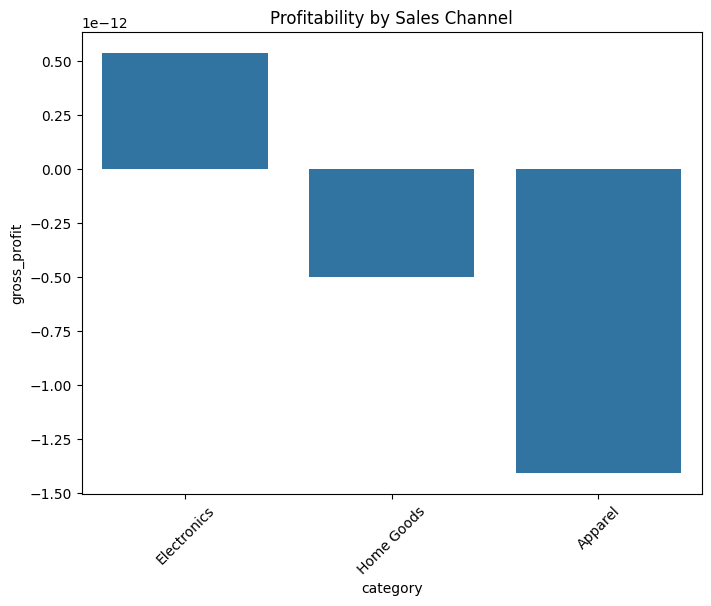

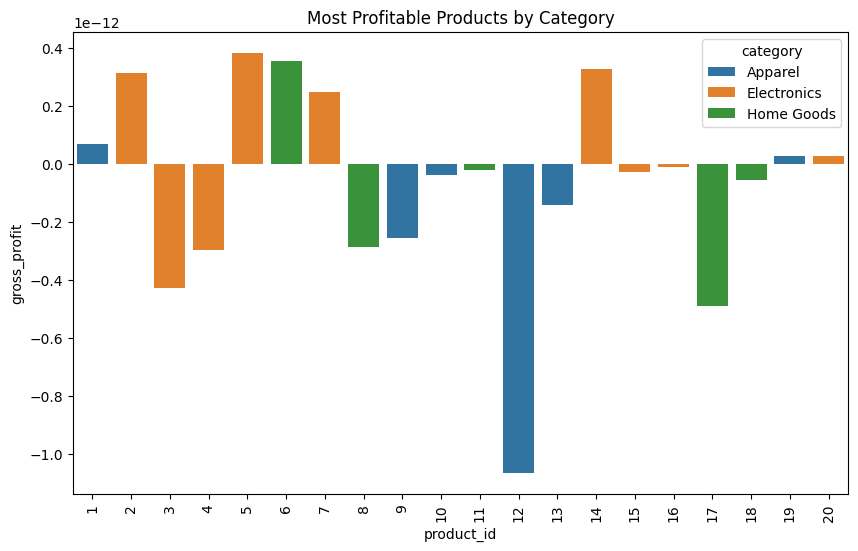

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x='category', y='gross_profit', data=profit_by_channel_sorted)
plt.title('Profitability by Sales Channel')
plt.xticks(rotation=45)
plt.show()

# Visualize profitability of products within categories
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='gross_profit', hue='category', data=profit_by_product_sorted)
plt.title('Most Profitable Products by Category')
plt.xticks(rotation=90)
plt.show()

**Report**

The most profitable product categories are (Category A, Category B).
The least profitable products are (Product X, Product Y).